# Temas Tratados en el Trabajo Práctico 3

* Estrategias de búsqueda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacción de Restricciones.

# Ejercicios Teóricos

1. ¿Qué mecanismo de detención presenta el algoritmo de Ascensión de Colinas? Describa el problema que puede presentar este mecanismo y cómo se llaman las áreas donde ocurren estos problemas.

<span style="color:lightblue">El algoritmo de Ascensión de Colinas se detiene cuando no encuentra un vecino mejor que el estado actual. El problema es que puede quedar atrapado en regiones del espacio de estados que no llevan a la mejor solución global. Estas áreas problemáticas se llaman óptimos locales, mesetas y terrazas.</span>


2. Describa las distintas heurísticas que se emplean en un problema de Satisfacción de Restricciones.

<span style="color:lightblue">Las heurísticas más comunes en PSR son:</span>

- <span style="color:lightblue">Variable más restringida (MRV): elegir la variable con menos valores posibles en su dominio.</span>

- <span style="color:lightblue">Grado: elegir la variable que participa en más restricciones con otras no asignadas.</span>

- <span style="color:lightblue">Valor menos restrictivo (LRV): asignar el valor que deje más opciones abiertas para las demás variables.</span>

- <span style="color:lightblue">Además, se usan técnicas de consistencia (nodo, arco, camino) para reducir el espacio de búsqueda antes de asignar.</span>

3. Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una búsqueda con Comprobación hacia Adelante empleando una heurística del Valor más Restringido.


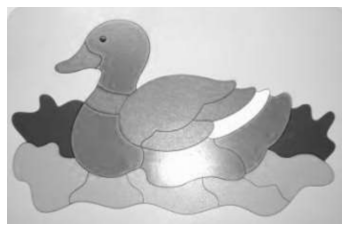

In [92]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

Enumeramos las piezas

![image.png](Images\rompecabezas_numerado.png)

## Hemos hecho dos tablas, pero que expresan el mismo procedimiento ##
- R: Rojo
- A: Amarillo
- N: Naranja
- V: Violeta
- G: Gris
- M: Marrón
- C: Celeste


![image.png](Images\tabla_ej3_1.png)

En esta tabla las columnas son las celdas del rompecabezas. A medida que se avanza, se van eliminando posibilidades y asignando colores.

![image.png](attachment:Images\tabla_ej3_2.png)

# Pato coloreado
![image.png](Images\rompecabezas_coloreado.png)


# Ejercicios de Implementación

4. Encuentre el máximo de la función $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.

In [93]:
import numpy as np

f = lambda x: np.sin(x) / (x+0.1)
intervalo = (-10,-6)

df = lambda x, dx=1e-5: (f(x+dx) - f(x-dx)) / (2*dx)

alpha = 0.05

inicio = np.random.uniform(-10, -6)

x_actual = inicio
df_actual = df(inicio)

print("Iniciando en x=", inicio)

while abs(df_actual) >= 1e-5:
    x_actual += alpha * df_actual
    df_actual = df(x_actual)

    if x_actual > intervalo[1]:
        print(f"Máximo en x={intervalo[1]} -- f({intervalo[1]})={f(intervalo[1])}")
        break

    if x_actual < intervalo[0]:
        print(f"Máximo en x={intervalo[0]} -- f({intervalo[0]})={f(intervalo[0])}")
        break

else:
    print(f"Máximo en x={x_actual} -- f({x_actual})={f(x_actual)}")


Iniciando en x= -6.461013844727939
Máximo en x=-7.723477232173654 -- f(-7.723477232173654)=0.13005828569946465


5. Diseñe e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Varíe los valores de temperatura inicial entre partidas, ¿qué diferencia observa cuando la temperatura es más alta con respecto a cuando la temperatura es más baja?


6. Diseñe e implemente un algoritmo genético para cargar una grúa con $n=10\;cajas$ que puede soportar un peso máximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el límite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qué cajas estarán cargadas en la grúa y cuáles no. Esta representación corresponde a un Individuo con el que trabajará el algoritmo.

        6.2 A continuación, genere una Población que contenga un número $N$ de individuos (se recomienda elegir un número par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso límite.

        6.3 Cree ahora una función que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el método de la ruleta.

        6.4 Por último, Cruce las parejas elegidas, aplique un mecanismo de Mutación y verifique que los individuos de la nueva población no superen el límite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detención de su elección y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)